This script contains thalweg plots for Puget sound for a thalweg drawn through adrimarlty inlet to Main basin. These thalweg plots show how several model variables change along the thalwegs such as salinity and temperature.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import xarray as xr
import glob
from tqdm.notebook import tqdm
import cmocean

%matplotlib inline
#Try changing things, try looking at the model output, and try comparing output from different times.
#In the 2018 files you have the years 2015-2018
#There is this star thing that people use in terminal (*) That is useful for finding files and you should try and find that.

## Thalweg Path

In [2]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc','r')
bathy = grid.variables['Bathymetry'][:,:]
thalweg = np.loadtxt('thalweg.txt', delimiter=' ', dtype=int)

In [16]:
# Reset variables for plotting
tmask = tmask[0, 0, ...]
variables = ['mesozooplankton']

219 39
231 78
254 107
261 146
265 183


/tmp/ipykernel_2596044/625425296.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(thalweg[:,1]+1,thalweg[:,0]+1,marker='o',color='yellow',MarkerSize=2)


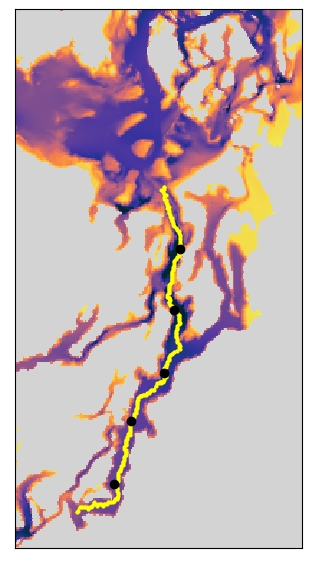

In [31]:
fig,ax = plt.subplots(1,1,figsize=(5,7))
cmap0=cmocean.cm.balance
cmap0.set_bad('lightgrey')
vmin=0
vmax=5
cmap1=cmocean.cm.thermal_r
cmap1.set_bad('lightgrey')

ps=ax.pcolormesh(np.ma.masked_where(tmask==0,((aggregates['mesozooplankton']['mean']*5.7*12/1000))),cmap=cmap1,vmin=vmin,vmax=vmax) # This will have to be changed in orderto get a clearer view of the Puget thalweg.
viz_tools.set_aspect(ax,coords='grid')
#fig.colorbar(ps)
cmap1.set_bad('lightgrey')
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

ax.plot(thalweg[:,1]+1,thalweg[:,0]+1,marker='o',color='yellow',MarkerSize=2)
ax.set_xlim(150,350)
ax.set_ylim(0,330)

for k in range (1,6):
    pylab.plot(thalweg[k*39,1]+1, thalweg[k*39,0]+1,'o',color='k')
    print(thalweg[k*39,1] + 1, thalweg[k*39,0] + 1)

## Thalweg plots
  method using contour_thalweg from visualisations.py in tools repo

In [32]:
#open bathy file and meshmask
f=nc.Dataset('/ocean/dlatorne/SalishSeaCast_5y_biology_20150101_20191231.nc')
#g=nc.Dataset('/results/SalishSea/nowcast-green.201812/01apr16/SalishSea_1h_20160401_20160401_grid_T.nc')
fbathy=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fmesh=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
il=5

In [33]:
def distance(thalweg,dx,dy,reverse=False):
    #this function calculates the distance travelled along the thalweg
    #thalweg is the array of grid coordinates.
    #dx is the grid spacing in x (eventually we could send an array in but for now it is a single value).
    #dy is the grid spacing in y (eventually we could send an array in but for now it is a single value).
    
    leng=thalweg.shape
    l =leng[0]
    distance = np.zeros(l)
    d=0
    
    for k in range(1,l):
        i1=thalweg[k-1,1]; i2=thalweg[k,1];
        j1=thalweg[k-1,0]; j2=thalweg[k,0];
        dseg =( (dx*(i2-i1))**2 + (dy*(j2-j1))**2)**(0.5)
        d=d+dseg
        distance[k]=d;
    if reverse == True:
        distance=np.flip(distance)
    return distance

Text(0, 0.5, ' z (m)')

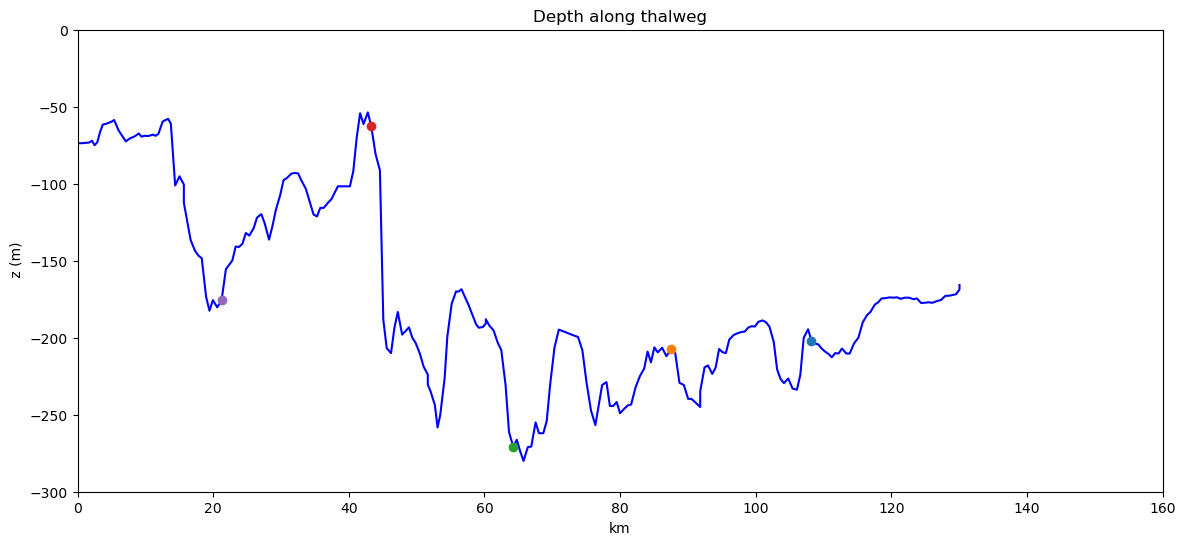

In [34]:
#look at the depths along the thalweg

depths = bathy[thalweg[:,0],thalweg[:,1]];
dx=400; dy=500
d = distance(thalweg,dx,dy,reverse=True); d=d/1000;

fig,ax = plt.subplots(1,1,figsize=(14,6))
ax.plot(d,-depths[:],color='b')
for k in range (1,6):
    pylab.plot(d[k*39], -depths[k*39],'o')

plt.ylim(-300,0)
plt.xlim(0,160)
ax.set_title('Depth along thalweg')
ax.set_xlabel('km')
ax.set_ylabel(' z (m)')

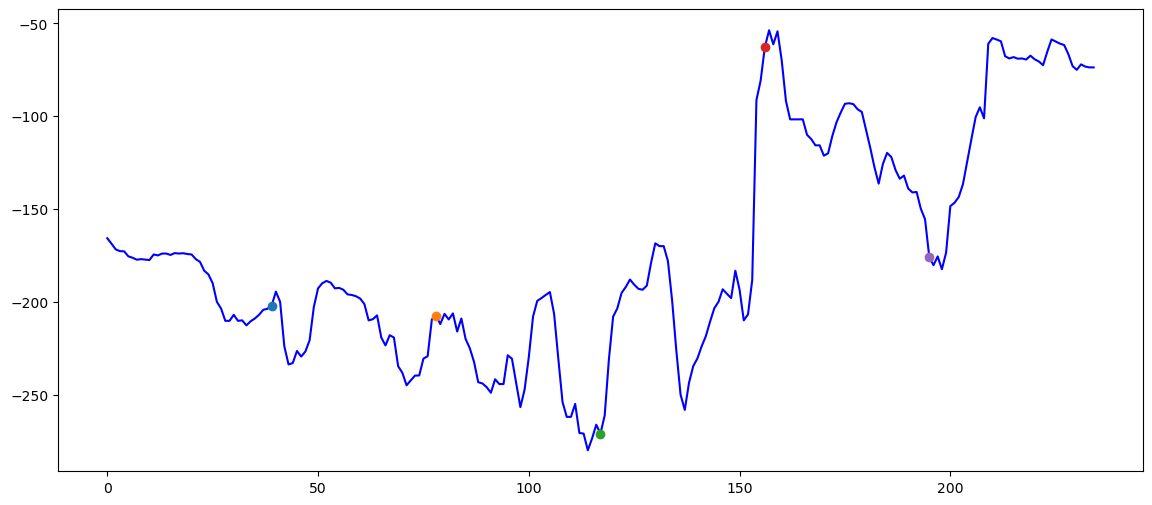

In [35]:

plt.figure(figsize=(14,6))
pylab.plot(-depths[:],color='b')
for k in range (1,6):
    pylab.plot(k*39, -depths[k*39],'o')

### Mesozooplankton

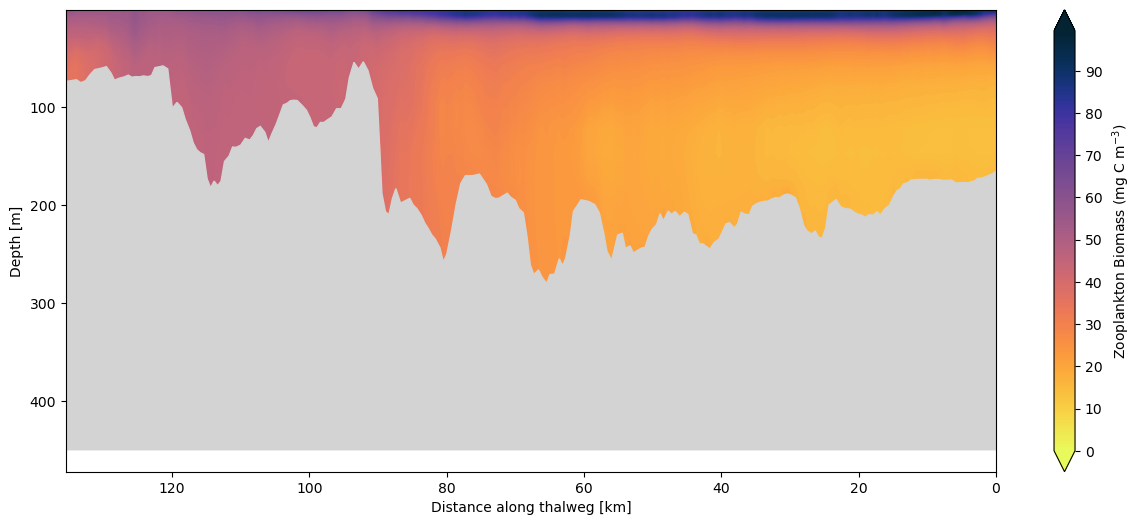

In [36]:
il=0
fig,ax=plt.subplots(1,1,figsize=(15,6))
#fig.title('Mesozooplankton Biomass')
levels = np.arange(0, 100, 0.5)
cmap=cmocean.cm.thermal_r


cb=visualisations.contour_thalweg(ax,f.variables['mesozooplankton'][il,...]*5.7*12,fbathy,fmesh,thalweg_file='thalweg.txt',clevels=levels,cmap=cmap,land_colour='lightgrey')
cb.set_label('Zooplankton Biomass (mg C m$^{-3}$)', rotation=90,labelpad=6)
ax.invert_xaxis()

#fig.suptitle('Mesozooplankton', fontsize=16)
#ax.text(15, 100, '(d)', fontsize=15,  color='k')
#plt.savefig('PugetSoundThalwegBackgroundPlot.png', bbox_inches='tight',dpi=1000,transparent=False)


In [37]:
fbathy.close()
fmesh.close()
f.close()
#g.close()